In [1]:
# Business objective: To predict Employee churning from the company
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
# to check if variables are in their correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# to check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# to check for any duplicated values in dataset
duplicates = df[df.duplicated()]

In [7]:
# there are no duplicated values in dataset
duplicates

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


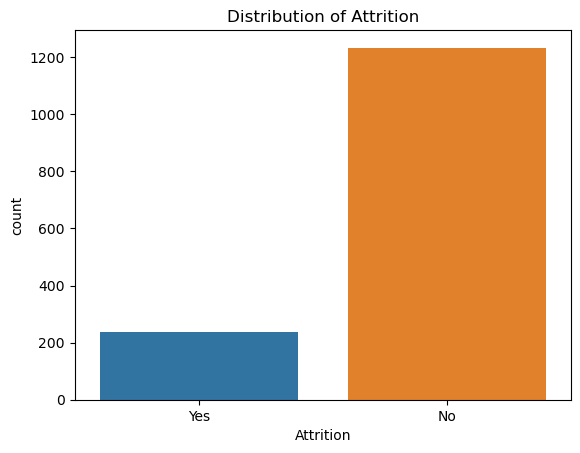

In [8]:
# to see the distribution of target variable 'Attrition'
sns.countplot(data=df, x='Attrition')
plt.title('Distribution of Attrition');

In [84]:
pd.DataFrame(df['Attrition'].value_counts())

,count
Attrition,
No,1233
Yes,237


In [85]:
# 16% of employee left the company
100*(df['Attrition'].value_counts()/len(df))

Attrition
No     83.877551
Yes    16.122449
Name: count, dtype: float64

In [10]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [11]:
# to see the descriptive statistics of 'Age' column
# the mean age of the employee is about 37 years
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [12]:
# to use custom function to separate 'Age' into different categories
def age_categories (z):
    if 18 <= z <=30:
        return "18 to 30"
    elif 31 <= z <= 45:
        return "31 to 45"
    elif 46 <= z <= 60:
        return "46 to 60"

In [13]:
# to use .apply() to the custom function
df['age_categories'] = df['Age'].apply(age_categories)

In [14]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,age_categories
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,31 to 45
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,46 to 60
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,31 to 45
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,31 to 45
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,18 to 30


In [15]:
# to print only the categorical columns
df.select_dtypes('object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,age_categories
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes,31 to 45
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No,46 to 60
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes,31 to 45
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes,31 to 45
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,18 to 30
...,...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No,31 to 45
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No,31 to 45
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes,18 to 30
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No,46 to 60


In [16]:
# to print only the numeric columns
df.select_dtypes('int','float')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'age_categories'],
      dtype='object')

In [18]:
# there are more male employees than female in the company
pd.DataFrame(df.groupby('Gender')['age_categories'].count())

,age_categories
Gender,
Female,588
Male,882


In [19]:
# to see Gender distribution by different age categories
pd.DataFrame(df.groupby(['Gender','age_categories'])['age_categories'].count())

age_categories
Gender age_categories                
Female 18 to 30                   146
       31 to 45                   321
       46 to 60                   121
Male   18 to 30                   240
       31 to 45                   490
       46 to 60                   152

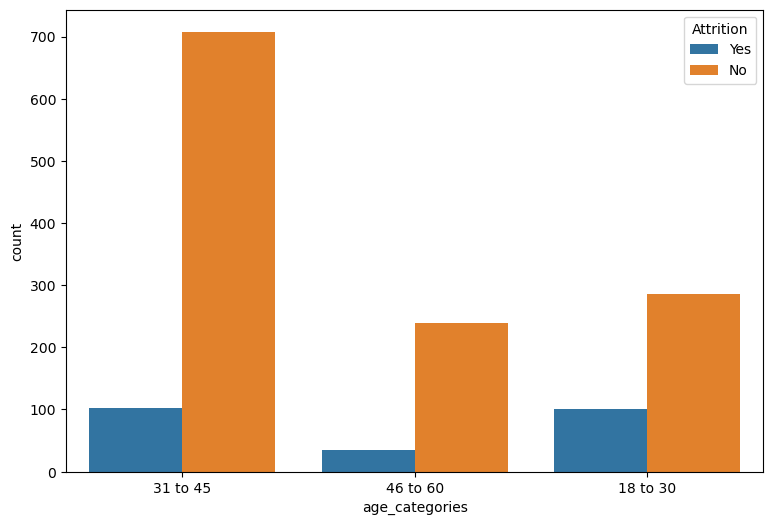

In [20]:
# to see the age group of employee who left the company
# age 31 to 45 left the company the most
plt.figure(figsize=(9,6),dpi=100)
sns.countplot(data=df, x='age_categories', hue='Attrition');

In [21]:
# to see which age group has the higher number of employee leaving ~ 31 to 35 years
pd.DataFrame(df.groupby(['age_categories','Attrition'])['Attrition'].count())

Attrition
age_categories Attrition           
18 to 30       No               286
               Yes              100
31 to 45       No               708
               Yes              103
46 to 60       No               239
               Yes               34

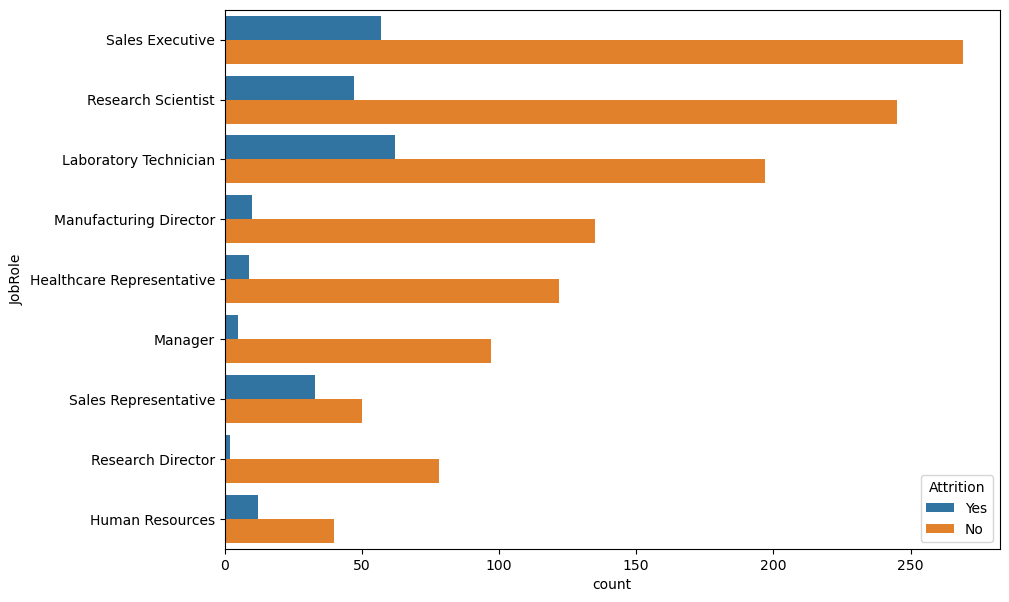

In [22]:
plt.figure(figsize=(10,7), dpi=100)
sns.countplot(data=df, y='JobRole', hue='Attrition');

In [23]:
# title 'Laboratory Technician' has the highest churn rate
pd.DataFrame(df.groupby(['JobRole','Attrition'])['Attrition'].count())

Attrition
JobRole                   Attrition           
Healthcare Representative No               122
                          Yes                9
Human Resources           No                40
                          Yes               12
Laboratory Technician     No               197
                          Yes               62
Manager                   No                97
                          Yes                5
Manufacturing Director    No               135
                          Yes               10
Research Director         No                78
                          Yes                2
Research Scientist        No               245
                          Yes               47
Sales Executive           No               269
                          Yes               57
Sales Representative      No                50
                          Yes               33

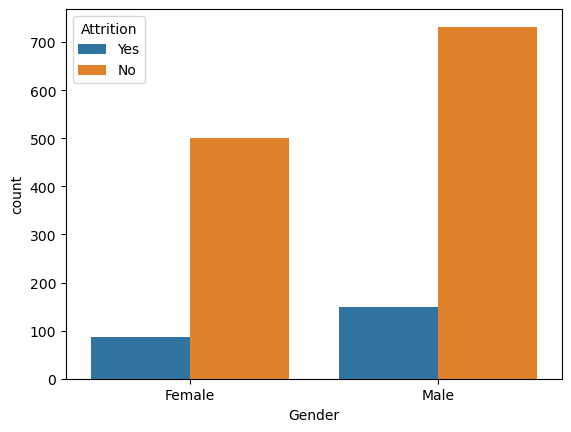

In [24]:
sns.countplot(data=df, x='Gender', hue='Attrition');

In [25]:
# Gender = males has the highest churn rate
pd.DataFrame(df.groupby(['Gender','Attrition'])['Attrition'].count())

Attrition
Gender Attrition           
Female No               501
       Yes               87
Male   No               732
       Yes              150

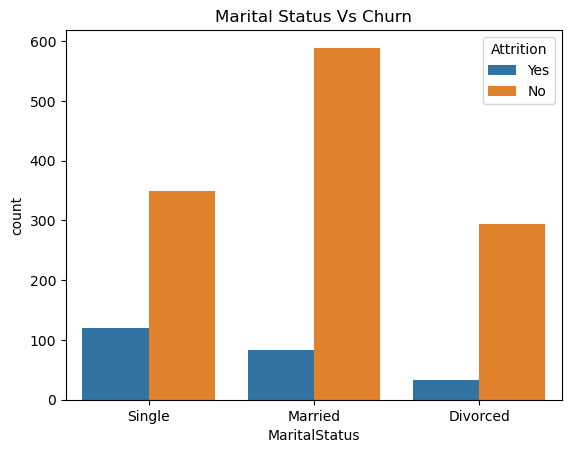

In [26]:
# to
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Marital Status Vs Churn');

In [27]:
# a high number of employees who left the company are mostly single
pd.DataFrame(df.groupby(['MaritalStatus','Attrition'])['Attrition'].count())

Attrition
MaritalStatus Attrition           
Divorced      No               294
              Yes               33
Married       No               589
              Yes               84
Single        No               350
              Yes              120

In [28]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

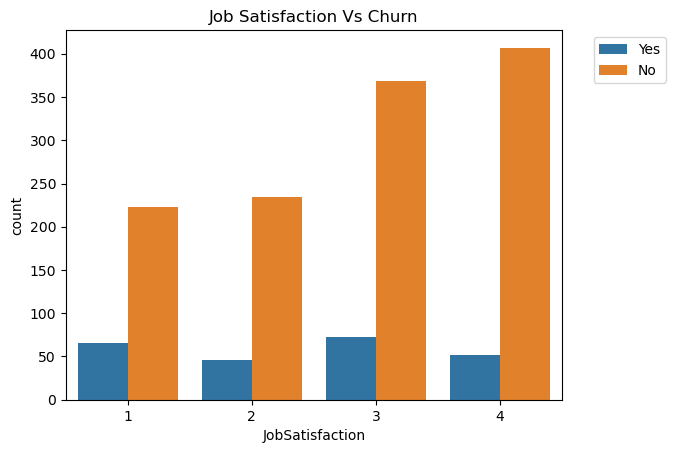

In [29]:
sns.countplot(data=df, x='JobSatisfaction', hue='Attrition')
plt.title('Job Satisfaction Vs Churn')
plt.legend(bbox_to_anchor=(1.05,1.0));

In [30]:
# Employee who had exited from the company have a Job Satisfaction rating = 3
pd.DataFrame(df.groupby(['JobSatisfaction','Attrition'])['Attrition'].count())

Attrition
JobSatisfaction Attrition           
1               No               223
                Yes               66
2               No               234
                Yes               46
3               No               369
                Yes               73
4               No               407
                Yes               52

In [31]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

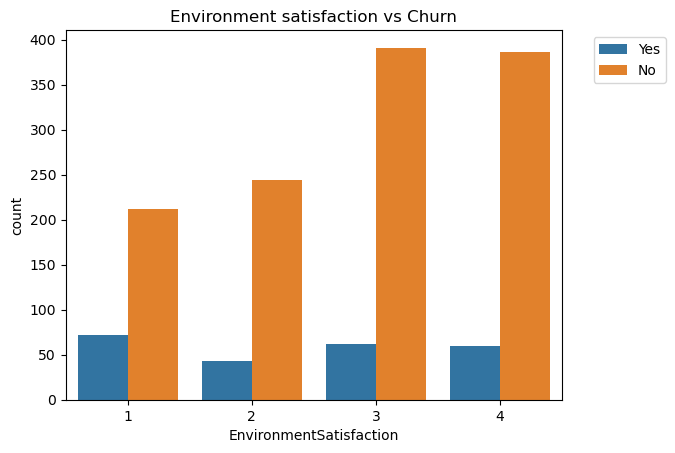

In [32]:
# employees who left have a 'EnvironmentSatisfaction' rating of 1
sns.countplot(data=df, x='EnvironmentSatisfaction', hue='Attrition')
plt.title('Environment satisfaction vs Churn')
plt.legend(bbox_to_anchor=(1.05,1.0));

In [33]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

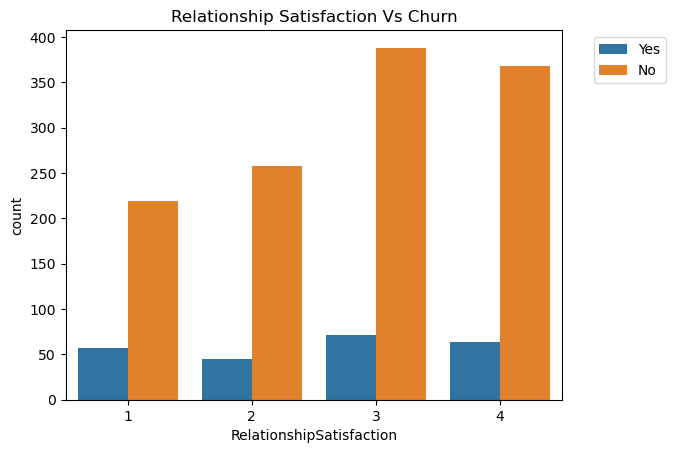

In [34]:
sns.countplot(data=df, x='RelationshipSatisfaction', hue='Attrition')
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Relationship Satisfaction Vs Churn');

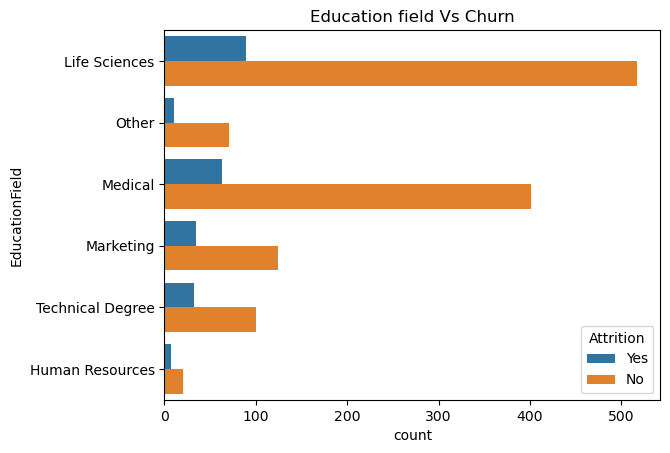

In [35]:
sns.countplot(data=df, y='EducationField', hue='Attrition')
plt.title('Education field Vs Churn');

In [36]:
# Employee who left the company are mostly from 'Life Sciences'
pd.DataFrame(df.groupby(['EducationField','Attrition'])['Attrition'].count())

Attrition
EducationField   Attrition           
Human Resources  No                20
                 Yes                7
Life Sciences    No               517
                 Yes               89
Marketing        No               124
                 Yes               35
Medical          No               401
                 Yes               63
Other            No                71
                 Yes               11
Technical Degree No               100
                 Yes               32

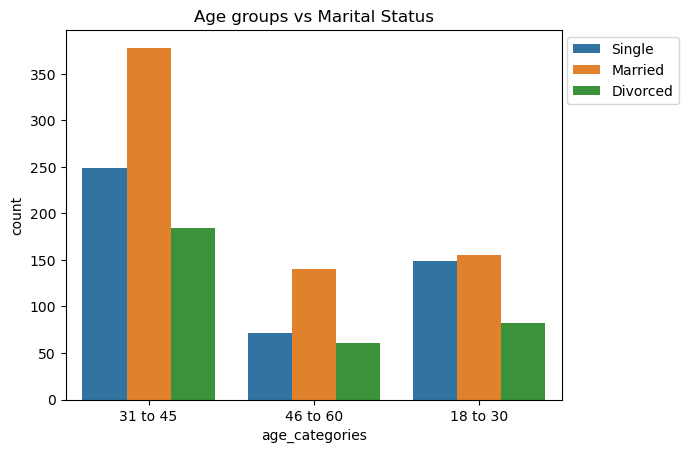

In [37]:
# employees age between 31 to 45 years are mostly married
sns.countplot(data=df, x='age_categories', hue='MaritalStatus')
plt.legend(bbox_to_anchor=(1.25,1.0))
plt.title('Age groups vs Marital Status');

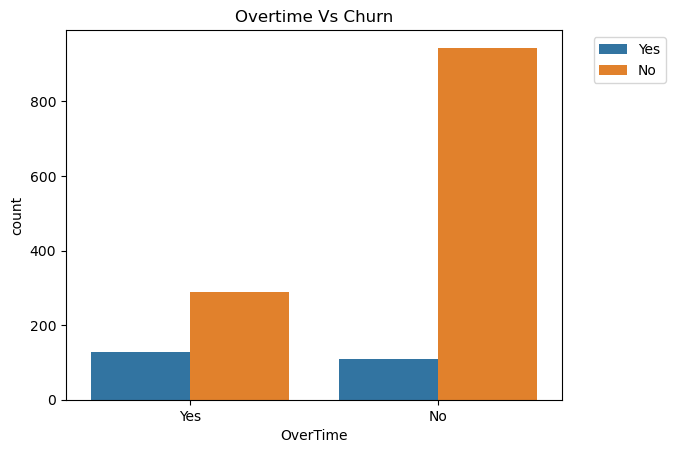

In [38]:
# a high number of employee who has been overtime in the company churned
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.title('Overtime Vs Churn');

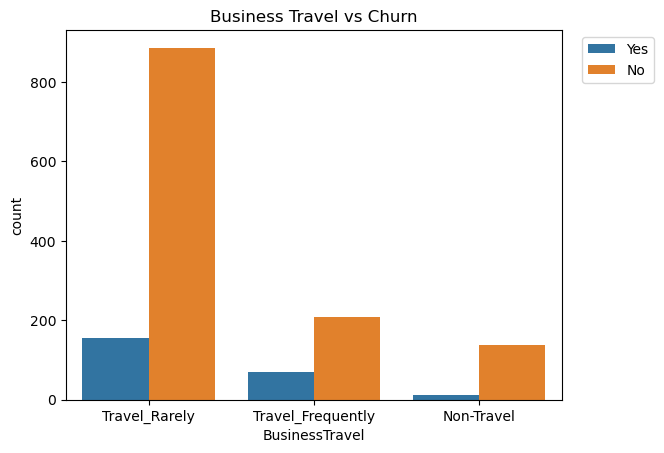

In [39]:
# Employees who rarely travel for work churn the most
sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Business Travel vs Churn');

In [40]:
# to remove unimportant variables before Predictive modelling
df = df.drop(['Age','EmployeeCount','EmployeeNumber','Over18','StandardHours',], axis=1)

In [41]:
# to define X and y
X = df.drop('Attrition', axis=1)

In [42]:
# to convert all categorical to numeric before machine learning
X = pd.get_dummies(X, drop_first=True)

In [43]:
X

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,age_categories_31 to 45,age_categories_46 to 60
0,1102,1,2,2,94,3,2,4,5993,19479,...,False,False,False,True,False,False,True,True,True,False
1,279,8,1,3,61,2,2,2,5130,24907,...,False,False,True,False,False,True,False,False,False,True
2,1373,2,2,4,92,2,1,3,2090,2396,...,False,False,False,False,False,False,True,True,True,False
3,1392,3,4,4,56,3,1,3,2909,23159,...,False,False,True,False,False,True,False,True,True,False
4,591,2,1,1,40,3,1,2,3468,16632,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,884,23,2,3,41,4,2,4,2571,12290,...,False,False,False,False,False,True,False,False,True,False
1466,613,6,1,4,42,2,3,1,9991,21457,...,False,False,False,False,False,True,False,False,True,False
1467,155,4,3,2,87,4,2,2,6142,5174,...,True,False,False,False,False,True,False,True,False,False
1468,1023,2,3,4,63,2,2,2,5390,13243,...,False,False,False,True,False,True,False,False,False,True


In [44]:
y = df['Attrition']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# training data = 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
scaler = StandardScaler()

In [49]:
# to scale, fit transform on the X train data to prevent data leakage to the y test set
scaled_X_train = scaler.fit_transform(X_train)

In [50]:
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [52]:
rf = RandomForestClassifier()

In [53]:
# to fit the Random Forest classifer model to the training data
rf.fit(scaled_X_train,y_train)

RandomForestClassifier()

In [54]:
# to predict on the scaled X test data
rf_pred = rf.predict(scaled_X_test)

In [55]:
# to print first 10 prediction of the random forest classifier model
rf_pred[:10]

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [57]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred)) # the accuracy rate for Random Forest classifier = 84%

[[363   8]
 [ 61   9]]


              precision    recall  f1-score   support

          No       0.86      0.98      0.91       371
         Yes       0.53      0.13      0.21        70

    accuracy                           0.84       441
   macro avg       0.69      0.55      0.56       441
weighted avg       0.80      0.84      0.80       441



In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# to build the decision tree classifer model
dt = DecisionTreeClassifier()

In [65]:
# to fit the dt model to training data
dt.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [66]:
# to do predictions on the scaled X test data
dt_pred = dt.predict(scaled_X_test)

In [67]:
print(confusion_matrix(y_test,dt_pred))
print('\n')
print(classification_report(y_test,dt_pred)) # Accuracy rate of the Decision tree classifier = 79%

[[328  43]
 [ 48  22]]


              precision    recall  f1-score   support

          No       0.87      0.88      0.88       371
         Yes       0.34      0.31      0.33        70

    accuracy                           0.79       441
   macro avg       0.61      0.60      0.60       441
weighted avg       0.79      0.79      0.79       441



In [68]:
# to build the AdaBoost classifer model
ada = AdaBoostClassifier()

In [69]:
ada.fit(scaled_X_train,y_train)

AdaBoostClassifier()

In [70]:
ada_pred = ada.predict(scaled_X_test)

In [71]:
print(confusion_matrix(y_test, ada_pred))
print('\n')
print(classification_report(y_test, ada_pred)) # Accuracy rate of the AdaBoost classifier model = 85%

[[346  25]
 [ 40  30]]


              precision    recall  f1-score   support

          No       0.90      0.93      0.91       371
         Yes       0.55      0.43      0.48        70

    accuracy                           0.85       441
   macro avg       0.72      0.68      0.70       441
weighted avg       0.84      0.85      0.85       441



In [72]:
gb = GradientBoostingClassifier()

In [73]:
gb.fit(scaled_X_train,y_train)

GradientBoostingClassifier()

In [74]:
gb_pred = gb.predict(scaled_X_test)

In [75]:
print(confusion_matrix(y_test, ada_pred))
print('\n')
print(classification_report(y_test, ada_pred)) # Accuracy rate of the Gradient Boost model = 85%

[[346  25]
 [ 40  30]]


              precision    recall  f1-score   support

          No       0.90      0.93      0.91       371
         Yes       0.55      0.43      0.48        70

    accuracy                           0.85       441
   macro avg       0.72      0.68      0.70       441
weighted avg       0.84      0.85      0.85       441



In [76]:
ada.feature_importances_

array([0.08, 0.04, 0.  , 0.04, 0.  , 0.06, 0.02, 0.02, 0.14, 0.08, 0.04,
       0.  , 0.  , 0.02, 0.02, 0.06, 0.02, 0.02, 0.04, 0.02, 0.04, 0.04,
       0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.02, 0.  , 0.  , 0.  , 0.02, 0.06, 0.02,
       0.  ])

In [77]:
pd.DataFrame(index = X.columns, data= ada.feature_importances_, columns=['Importance'])

,Importance
DailyRate,0.08
DistanceFromHome,0.04
Education,0.00
EnvironmentSatisfaction,0.04
HourlyRate,0.00
JobInvolvement,0.06
JobLevel,0.02
JobSatisfaction,0.02
MonthlyIncome,0.14
MonthlyRate,0.08


In [78]:
ada_imp = pd.DataFrame(index = X.columns, data= ada.feature_importances_, columns=['Importance']).sort_values('Importance', ascending=False)

In [79]:
ada_imp

,Importance
MonthlyIncome,0.14
DailyRate,0.08
MonthlyRate,0.08
OverTime_Yes,0.06
JobInvolvement,0.06
TotalWorkingYears,0.06
EnvironmentSatisfaction,0.04
NumCompaniesWorked,0.04
DistanceFromHome,0.04
YearsWithCurrManager,0.04


In [80]:
# to remove out variable importance of less than 1
ada_imp = ada_imp[ada_imp['Importance'] > 0]

In [81]:
ada_imp

,Importance
MonthlyIncome,0.14
DailyRate,0.08
MonthlyRate,0.08
OverTime_Yes,0.06
JobInvolvement,0.06
TotalWorkingYears,0.06
EnvironmentSatisfaction,0.04
NumCompaniesWorked,0.04
DistanceFromHome,0.04
YearsWithCurrManager,0.04


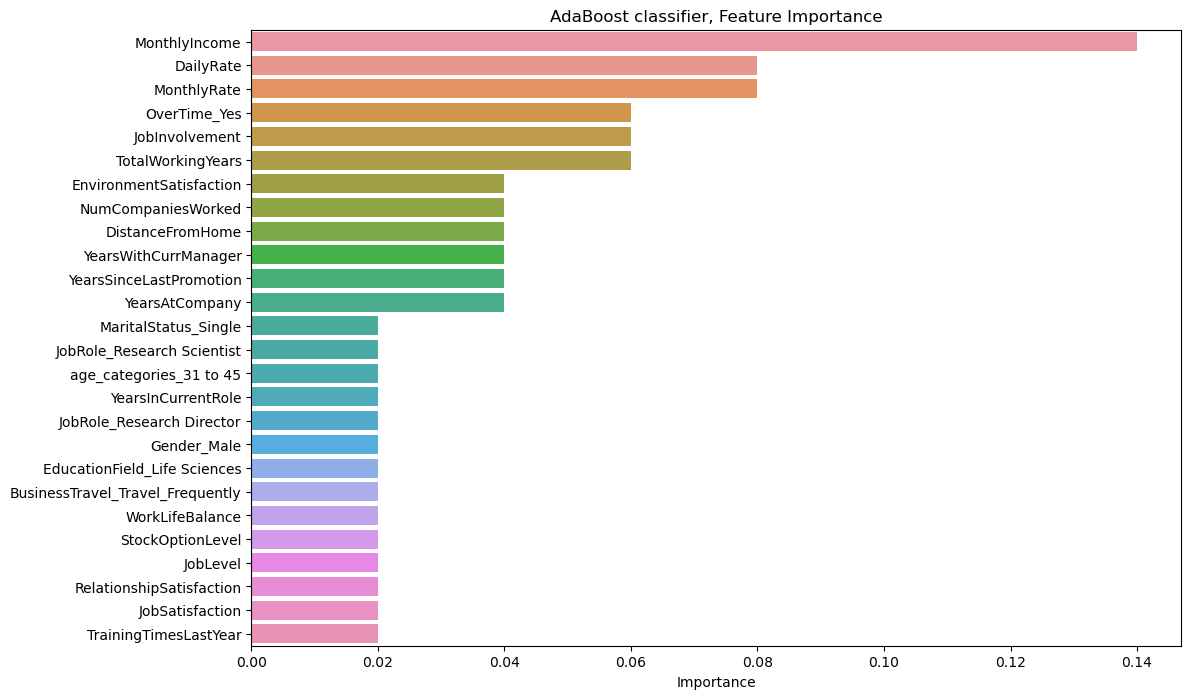

In [83]:
# visualise feature importance in a barplot
# Top 5 predictors if employee will resign: 'MonthlyIncome','DailyRate','MonthlyRate','OverTime_Yes','JobInvolvement'
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(data=ada_imp, x='Importance', y=ada_imp.index)
plt.title('AdaBoost classifier, Feature Importance');